# Exploratory Data Analysis (EDA)

## Research Questions
- What is the distribution of churn?
- Are there strong imbalances in the target variable?
- Which features are potentially informative for churn prediction?


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [17]:
from pathlib import Path

DATA_PATH = Path("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(DATA_PATH)

In [18]:
df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

### Observations
- The dataset contains X samples and Y features.
- The target variable is `Churn`.
- Most features are categorical, which will require encoding.


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Some columns contain missing or invalid values (e.g. total charges).
- This will need to be handled during preprocessing.

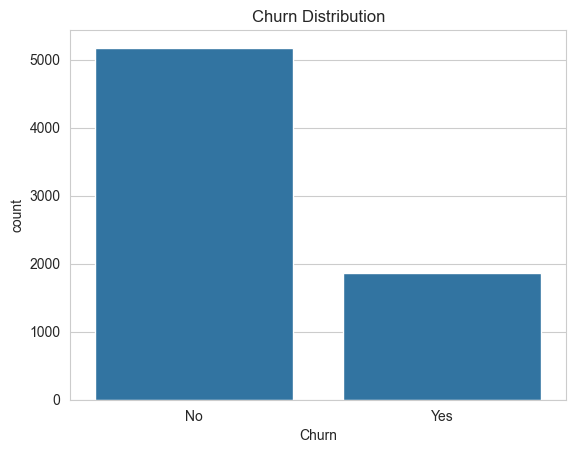

In [20]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


- The dataset shows a moderate class imbalance.
- Accuracy alone may not be a reliable evaluation metric.

In [21]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## EDA Summary
- The churn rate is not evenly distributed across customers.
- Customers with shorter tenure appear more likely to churn.
- Monthly charges vary significantly between churned and non-churned users.
- These observations suggest that tenure and pricing-related features may be important for modeling.
